# Week 7 Day 1: Structured data (AKA: Pandas DataFrames)

## Objectives:

* Learn to create and read in DataFrames
* Learn to use Series
* Learn some basic manipulation skills
* Learn where to find more information about Pandas

In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Let's start with the following table of data:


In [2]:
state = np.random.RandomState(42)
time = np.linspace(0, 2, 10)
xs = time * 0.3 + (state.rand(10) - 0.5) * 0.1
ys = -(time ** 2) + 2 * time + (state.rand(10) - 0.5) * 0.1
print("      time          x          y\n")
for t, x, y in zip(time, xs, ys):
    print(f"{t:10.4} {x:10.4} {y:10.4}")

      time          x          y

       0.0   -0.01255   -0.04794
    0.2222     0.1117     0.4421
    0.4444     0.1565     0.7246
    0.6667     0.2099     0.8601
    0.8889     0.2323     0.9558
     1.111     0.2989      0.956
     1.333     0.3558     0.8693
     1.556     0.5033     0.6938
     1.778     0.5434     0.3883
       2.0     0.6208   -0.02088


We would like to view and work with this as a coherent single entity. If we chose to use a matrix, we'd have some issues:

* Our axes are inherently different - operations along columns make sense, rows... Not so much.
* One of the axis has labels (time, x, and y) that we'd lose, making our code harder to read
* What happens if we have different data types?
* Normal matrix operations (like multiplication) don't really make sense

Let's just look at what a Pandas DataFrame would look like, then we'll talk a bit more about them. Note that there are a **ton** of ways to make a DataFrame. And we have some choices we will ignore for now.

In [3]:
df = pd.DataFrame({"time": time, "x": xs, "y": ys})
df

,time,x,y
0,0.000000,-0.012546,-0.047942
1,0.222222,0.111738,0.442053
2,0.444444,0.156533,0.724602
3,0.666667,0.209866,0.860123
4,0.888889,0.232269,0.955837
5,1.111111,0.298933,0.955995
6,1.333333,0.355808,0.869313
7,1.555556,0.503284,0.693834
8,1.777778,0.543445,0.388256
9,2.000000,0.620807,-0.020877


Our time would make a better index than the default 0,1,2,...,9, so let's try that:

In [4]:
df.set_index("time", inplace=True)
df

,x,y
time,,
0.000000,-0.012546,-0.047942
0.222222,0.111738,0.442053
0.444444,0.156533,0.724602
0.666667,0.209866,0.860123
0.888889,0.232269,0.955837
1.111111,0.298933,0.955995
1.333333,0.355808,0.869313
1.555556,0.503284,0.693834
1.777778,0.543445,0.388256


In [5]:
# df.index = pd.to_timedelta(df.index, unit='s')

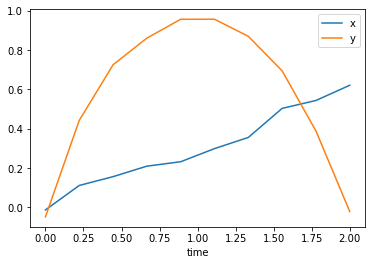

In [6]:
df.plot()

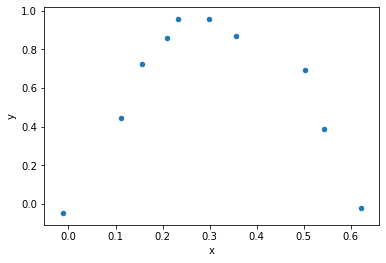

In [7]:
# df.plot('x', 'y', kind='scatter');
df.plot.scatter("x", "y")

There are two ways to access columns:

In [8]:
df["x"]

time
0.000000   -0.012546
0.222222    0.111738
0.444444    0.156533
0.666667    0.209866
0.888889    0.232269
1.111111    0.298933
1.333333    0.355808
1.555556    0.503284
1.777778    0.543445
2.000000    0.620807
Name: x, dtype: float64

In [9]:
df.x

time
0.000000   -0.012546
0.222222    0.111738
0.444444    0.156533
0.666667    0.209866
0.888889    0.232269
1.111111    0.298933
1.333333    0.355808
1.555556    0.503284
1.777778    0.543445
2.000000    0.620807
Name: x, dtype: float64

A column is a "Series": That's like a 1D array but with an index and possibly a name attached. The Series align on index instead of location - if you add two Series, matching indexed value will add.

The `['x']` syntax is more general, but the `.x` syntax is shorter, and much nicer in a notebook. It doesn't work for setting brand new columns, or if the name of a column is not valid in Python or would overwrite an existing property or method.

DataFrames and Series follow the array protocol, so numpy operation work on them too:

In [10]:
df["r"] = np.sqrt(df.x ** 2 + df.y ** 2)
df

,x,y,r
time,,,
0.000000,-0.012546,-0.047942,0.049556
0.222222,0.111738,0.442053,0.455956
0.444444,0.156533,0.724602,0.741317
0.666667,0.209866,0.860123,0.885356
0.888889,0.232269,0.955837,0.983653
1.111111,0.298933,0.955995,1.001642
1.333333,0.355808,0.869313,0.939311
1.555556,0.503284,0.693834,0.857147
1.777778,0.543445,0.388256,0.667889


DataFrames are designed to make it easy to add and operate on columns; you should not in general be adding new rows (this should tell you what the internal memory layout must be like).

Note that you can use `.apply` to apply a function to a DataFrame with a bit more control, or `.applymap` to apply a function element-wise to a DataFrame or Series (but the function is a Python function, so the loop must happen in Python so it is slower than `.apply`)

## Pandas features

#### Pandas design:
* Make everything as Pythonic as possible. Even if that means there are many ways of doing things.
* Design around everyday usage rather than theory

#### Features:

* **Index** types: Several custom arrays with extra features for types of indexes
    * Including hierarchical indexes, which allow multidimensional-like data to be used
* **Series**: A 1D array with an attached index
    * New types: Powerful datetime and timedelta features, including special calender support, periodic times, etc.
    * Categorical support (a bit more powerful than sets)
* **DataFrame**: a table of data with indexes and headers
* Great input/output support for lots of data formats (`.csv`, Excel, many more)
* Great output display, notebook support
* Amazing data manipulation
* Like Numpy, can be a standard for other statistical packages

### Constructing and writing a dataframe

* See the DataFrame's help for a massive list of options.
* Reading in a DataFrame is done with the `pd.read_*` functions.
* Writing a DataFrame is done with the `df.to_*` methods.

See **Table 5-1: Possible data inputs to DataFrame constructor** in *Python for Data Analysis, 2nd edition*, by Wes McKinney. Also Chapter 6 for reading/writing DataFrames.

### Indexing

`df[x]` is a special case - it behaves differently depending on the arguments - columns normally but some cases are rows (such as when using a boolean Series). When doing something specific, use the specialized accessors:

* `df[column]`: Select a column
* `df.loc[row, column]`: Indexing by names
* `df.iloc[row, column]`: Indexing by number
* `at` and `iat` are available for single values.

Note that using a `list` is different than a `tuple` in an indexing expression in Pandas.

#### See Table 5.4 for ways to index a DataFrame

Indexing options with DataFrame in *Python for Data Analysis, 2nd edition*, by Wes McKinney.

## Iris dataset
Let's look at one of the seaborn datasets (seaborn is a plotting wrapper on MatPlotLib that helps with statistical visualization - but we are just using it's handy example datasets which load in Pandas. Internet required.)

In [11]:
df = sns.load_dataset("iris")
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


A few things of note:

* No column makes sense as an index here - we'll just leave the numerical index.
* We have a categorical column - but it didn't read in as a categorical datatype! That's easy to fix:

In [12]:
df.species = df.species.astype("category")

We can quickly get some information about the data:

In [13]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   sepal_length  150 non-null    float64 
 1   sepal_width   150 non-null    float64 
 2   petal_length  150 non-null    float64 
 3   petal_width   150 non-null    float64 
 4   species       150 non-null    category
dtypes: category(1), float64(4)
memory usage: 5.1 KB


In [15]:
df.dtypes

sepal_length     float64
sepal_width      float64
petal_length     float64
petal_width      float64
species         category
dtype: object

### Accessors

You can use an "accessor" (Pandas terminology) to perform operations on series as a specific type:
* `.str`: string methods that act on the series
* `.cat`: Operations on categories
* `.dt`: Datetime operations
* `.plot`: Serves two purposes, either acts like a plot function or gives you access to other types of plots

In [16]:
df.species.str.capitalize().head()

0    Setosa
1    Setosa
2    Setosa
3    Setosa
4    Setosa
Name: species, dtype: object

In [17]:
df.species.cat.categories

Index(['setosa', 'versicolor', 'virginica'], dtype='object')

We can use a boolean Series to select rows from a DataFrame (or another Series):

In [18]:
df[df.species == "setosa"].head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Let's select just two rows of our table: (Note: this *must* be a list, not a tuple)

In [19]:
df[["sepal_length", "sepal_width"]].head()

,sepal_length,sepal_width
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6


We can combine what we've learned:

(notice the automatic x and y axis labels)

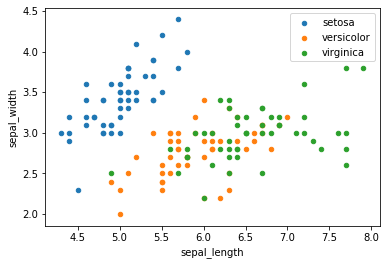

In [20]:
fig, ax = plt.subplots()
for i, category in enumerate(df.species.cat.categories):
    df[df.species == category].plot.scatter(
        "sepal_length", "sepal_width", label=category, c=f"C{i}", ax=ax
    )
plt.show()

MatPlotLib now has better support for Pandas, which makes this a bit easier:

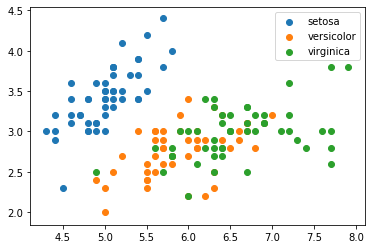

In [21]:
fig, ax = plt.subplots()
for category in df.species.cat.categories:
    ax.scatter(
        "sepal_length", "sepal_width", data=df[df.species == category], label=category
    )
plt.legend()
plt.show()

We could make this even nicer with a groupby, which returns a group you can iterate over to get the name and dataframe:

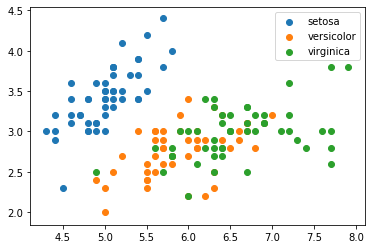

In [22]:
fig, ax = plt.subplots()
for name, group in df.groupby("species"):
    ax.scatter("sepal_length", "sepal_width", data=group, label=name)
plt.legend()
plt.show()

Pandas supports lots more, like database style merges and joins, etc.

In general, the best thing to do with Pandas is search and look around to see if the functionality you want is there. Avoid loops and anything that looks ugly until you are sure it's the only what to do what you want.

Pandas can be seen as similar to:

* Excel
* R
* SQL
* SAS
* Stata
* ROOT (some parts)

Learn more at:

* [Pandas website](https://pandas.pydata.org)
* Our recommended book (available on the UC libraries online)
* [10 minutes to Pandas](http://pandas.pydata.org/pandas-docs/stable/10min.html)